In [1]:
import os

In [2]:
data_dir = "data"

dogs_dir = os.path.join(data_dir, "dogs")
wolves_dir = os.path.join(data_dir, "wolves")

num_dogs = len(os.listdir(dogs_dir))
num_wolves = len(os.listdir(wolves_dir))

print("Total dogs images", num_dogs)
print("Total wolves images", num_wolves)

Total dogs images 861
Total wolves images 1000


In [3]:
dogs_images = os.listdir(dogs_dir)
wolves_images = os.listdir(wolves_dir)

print("5 Dog Images:")
for img in dogs_images[:5]:
    print(img)

print("\n5 Wolves images:")
for img in wolves_images[:5]:
    print(img)

5 Dog Images:
n02089078_353.jpg
n02089078_3652.jpg
n02089078_3932.jpg
n02089078_4362.jpg
n02089867_1764.jpg

5 Wolves images:
09e95736-bfac-11e9-8f25-9b5536624008_image_hires_063817.jpg
1576008278152.jpeg
190307-grey-wolves.jpg
190607_wolves_full.jpg
41500552_303.jpg


In [4]:
import matplotlib.pyplot as plt
from PIL import Image

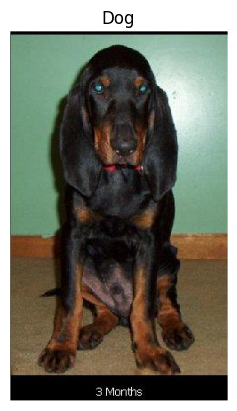

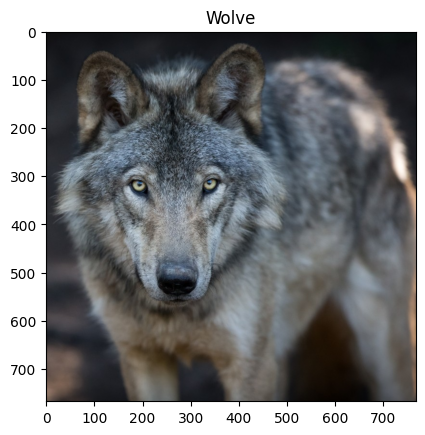

In [7]:
dog_img_path = os.path.join(dogs_dir, dogs_images[0])
dog_img = Image.open(dog_img_path)

plt.imshow(dog_img)
plt.title("Dog")
plt.axis("off")
plt.show()

wolves_img_path = os.path.join(wolves_dir, wolves_images[0])
wolves_img = Image.open(wolves_img_path)

plt.imshow(wolves_img)
plt.title("Wolve")
plt.show()

In [23]:
DATA_DIR = "data"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [24]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation",
    shuffle=False
)


Found 1489 images belonging to 2 classes.
Found 372 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

In [13]:
model_baseline = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape= (224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(1, activation= "sigmoid")
])


model_baseline.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history_baseline = model_baseline.fit(
    train_gen,
    epochs = 10,
    validation_data = val_gen
)

Epoch 1/10


c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5226 - loss: 1.6941 - val_accuracy: 0.6156 - val_loss: 0.6520
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 606ms/step - accuracy: 0.7156 - loss: 0.6116 - val_accuracy: 0.6801 - val_loss: 0.6311
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 626ms/step - accuracy: 0.7979 - loss: 0.4888 - val_accuracy: 0.7070 - val_loss: 0.6269
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 628ms/step - accuracy: 0.8973 - loss: 0.2737 - val_accuracy: 0.6747 - val_loss: 0.6995
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9632 - loss: 0.1280 - val_accuracy: 0.6586 - val_loss: 0.8441
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 641ms/step - accuracy: 0.9772 - loss: 0.0729 - val_accuracy: 0.6640 - val_loss: 1.0365
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 626ms/step - accuracy: 0.9970 - loss: 0.0247 - val_accuracy: 0.6828 - val_loss: 1.1650
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.6828 - val_

In [15]:
model_phase2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model_phase2.compile(
    optimizer='adam',
    loss ='binary_crossentropy',
    metrics= ['accuracy']
)

c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience =3,
    restore_best_weights =True
)

In [18]:
history_phase2 = model_phase2.fit(
    
    train_gen,
    epochs=20,
    validation_data = val_gen,
    callbacks = [early_stop]

)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 705ms/step - accuracy: 0.5298 - loss: 2.5503 - val_accuracy: 0.6129 - val_loss: 0.6770
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 652ms/step - accuracy: 0.6562 - loss: 0.6617 - val_accuracy: 0.6317 - val_loss: 0.6706
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 655ms/step - accuracy: 0.6817 - loss: 0.6141 - val_accuracy: 0.6559 - val_loss: 0.6298
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 650ms/step - accuracy: 0.7555 - loss: 0.5383 - val_accuracy: 0.6720 - val_loss: 0.6206
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 653ms/step - accuracy: 0.7927 - loss: 0.4902 - val_accuracy: 0.6667 - val_loss: 0.6048
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 691ms/step - accuracy: 0.8162 - loss: 0.4033 - val_accuracy: 0.6882 - val_loss: 0.5925
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 741ms/step - accuracy: 0.9039 - loss: 0.2759 - val_accuracy: 0.6774 - val_loss: 0.6789
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 712ms/step - accuracy: 0.9117 - loss: 0.2422 - val_accu

In [22]:
#Model phase 3 with augmentaion

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 25,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2
)


val_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset='training',
    shuffle = True
)

val_gen = val_datagen.flow_from_directory(
    DATA_DIR,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation',
    shuffle = False
)

Found 1489 images belonging to 2 classes.
Found 372 images belonging to 2 classes.


In [23]:
history_phase3 = model_phase2.fit(
    train_gen,
    epochs = 30,
    validation_data = val_gen,
    callbacks = [early_stop]
)

Epoch 1/30


c:\Users\sarfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 757ms/step - accuracy: 0.7115 - loss: 0.5998 - val_accuracy: 0.6962 - val_loss: 0.6012
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 700ms/step - accuracy: 0.7157 - loss: 0.5833 - val_accuracy: 0.7177 - val_loss: 0.5934
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 684ms/step - accuracy: 0.7494 - loss: 0.5564 - val_accuracy: 0.7124 - val_loss: 0.5702
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 682ms/step - accuracy: 0.7560 - loss: 0.5328 - val_accuracy: 0.7554 - val_loss: 0.5705
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 699ms/step - accuracy: 0.7492 - loss: 0.5349 - val_accuracy: 0.7688 - val_loss: 0.5356
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7909 - loss: 0.4957 - val_accuracy: 0.7849 - val_loss: 0.5094
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7659 - loss: 0.4983 - val_accuracy: 0.7177 - val_loss: 0.5703
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7663 - loss: 0.4961 - val_accuracy: 0.7500 - val_

PHASE 4 -> TRANSFER LEARNING

In [5]:
#phase 4 transfer learning
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


In [8]:
base_model = MobileNetV2(
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224,3)
)
base_model.trainable = False

model_phase4 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_phase4.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# history_phase4 = model_phase4.fit(
#     train_gen,
#     epochs=20,
#     validation_data=val_gen,
#     callbacks=[early_stop]
# )


In [26]:
train_gen.class_indices


{'dogs': 0, 'wolves': 1}

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [26]:
def predict_images_from_folder(folder_path, model, class_names):
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # skip non-image files
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        # load & preprocess image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # prediction
        prediction = model.predict(img_array, verbose=0)[0][0]

        # ---- THRESHOLD LOGIC ----
        if prediction >= 0.5:
            label = class_names[1]   # Wolf
            confidence = prediction
        elif prediction <= 0.4:
            label = class_names[0]   # Dog
            confidence = 1 - prediction
        else:
            label = "Uncertain"
            confidence = max(prediction, 1 - prediction)
        # ------------------------

        # show result
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{img_name} → {label} ({confidence*100:.2f}%)")
        plt.show()


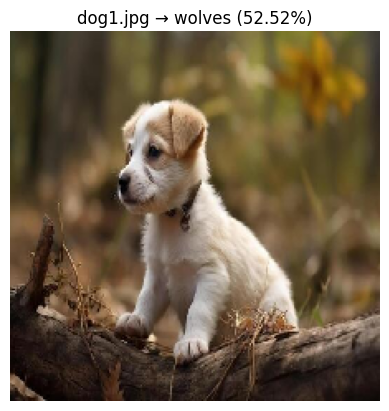

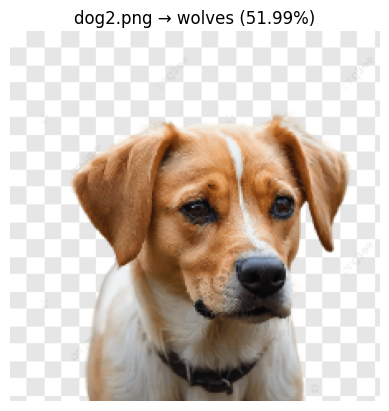

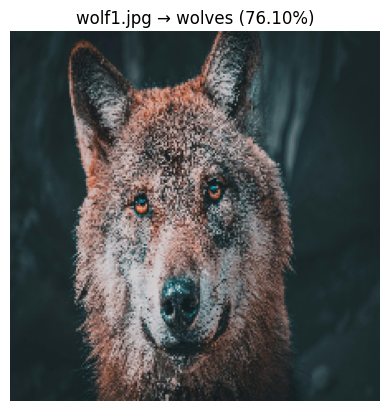

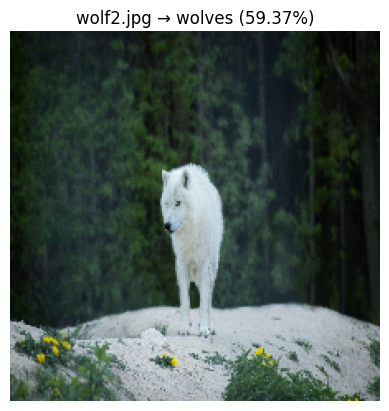

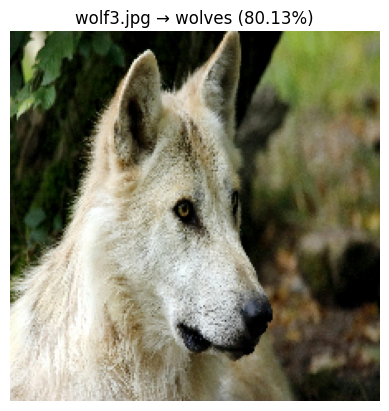

In [27]:
final_model = model_phase4
class_names = ['dogs', 'wolves']

predict_images_from_folder(
    folder_path="realtest",
    model=final_model,
    class_names=class_names
)


In [18]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 330.3 kB/s eta 0:00:25
   ---------------------------------------- 0.0/8.0 MB 330.3 kB/s eta 0:00:25
   ---------------------------------------- 0.1/8.0 MB 328.2 kB/s eta 0:00:25
   ---------------------------------------- 0.1/8.0 MB 403.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/8.0 MB 403.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/8.0 MB 459.5 kB/s eta 0:00:18
   - -------------------------------------- 0.2/8.0 MB 625.1 kB/s eta 0:00:13
   - -------------------------------------- 0.2/8.0 MB 576.2 kB/s eta 0:00:14
   - -------------------------------------- 0.3/8.0 MB 746.0 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/8.0 MB 973.2 kB/s eta 0:00:08
   -- ------------------------------------- 0.5/8.0 MB 925.6 kB/s eta 0:00:09
   -


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
model_phase4.save("dogs_vs_wolves_mobilenetv2.keras")


In [21]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 328.2 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/294.9 kB 368.6 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 458.0 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 625.1 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 576.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 649.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step


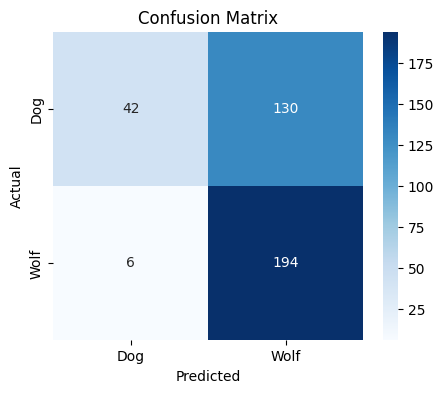

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# true labels
y_true = val_gen.classes

# predictions
y_pred_prob = model_phase4.predict(val_gen)
y_pred = (y_pred_prob > 0.5).astype(int)

# confusion matrix
cm = confusion_matrix(y_true, y_pred)

# plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Dog", "Wolf"],
            yticklabels=["Dog", "Wolf"],
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Decision Boundary Tuning

In [29]:
import numpy as np

def predict_with_threshold(model, generator, threshold=0.5):
    # true labels
    y_true = generator.classes

    # predicted probabilities
    y_prob = model.predict(generator)
    y_prob = y_prob.ravel()

    # apply threshold
    y_pred = np.where(y_prob >= threshold, 1, 0)

    return y_true, y_pred


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, class_names, threshold):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names,
                yticklabels=class_names)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Threshold = {threshold})")
    plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step


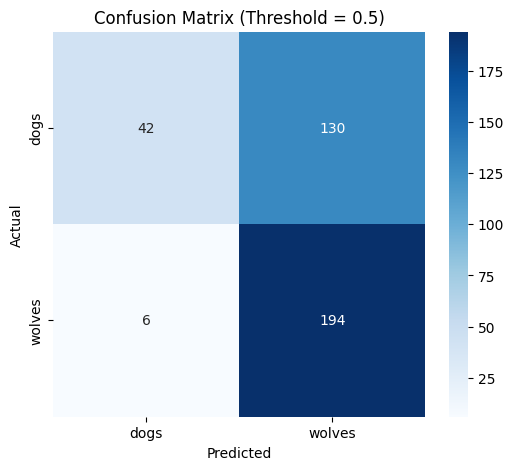

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 408ms/step


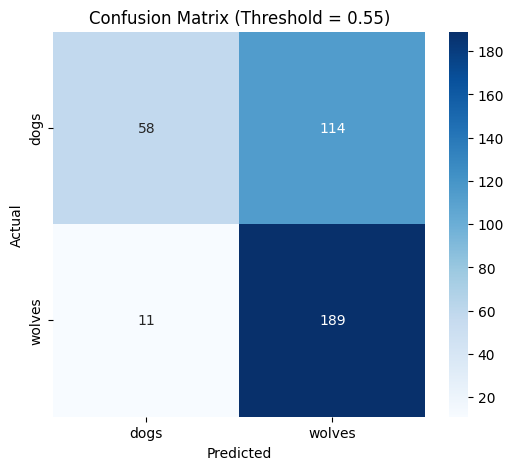

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 401ms/step


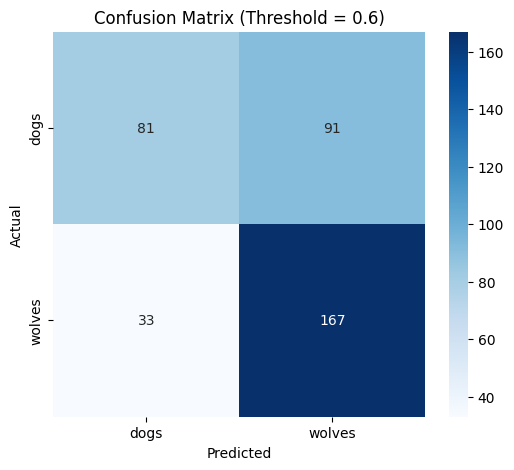

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step


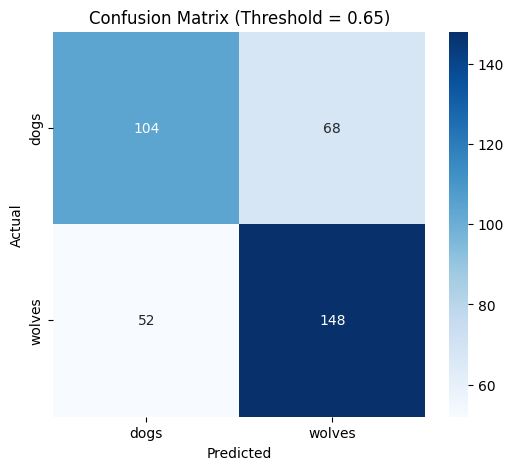

In [32]:
thresholds = [0.5, 0.55, 0.6, 0.65]

for t in thresholds:
    y_true, y_pred = predict_with_threshold(model_phase4, val_gen, threshold=t)
    plot_confusion_matrix(y_true, y_pred, class_names, t)
